# **1. Build a Base Convolutional Neural Network (CNN) Model**


**Import Libraries**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


**Download and Prepare the Dataset**

We will use a subset of the Cats vs. Dogs dataset provided by Microsoft. TensorFlow provides utilities to download and extract this dataset.

In [ ]:
# Download the dataset (Cats vs. Dogs)
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

# Define the base directory
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')


68606236/68606236 [==============================] - 0s 0us/step



**Set Up Directory Paths**

In [ ]:
# Define paths to training and validation directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


**Display 9 Images of Cats and 9 Images of Dogs**

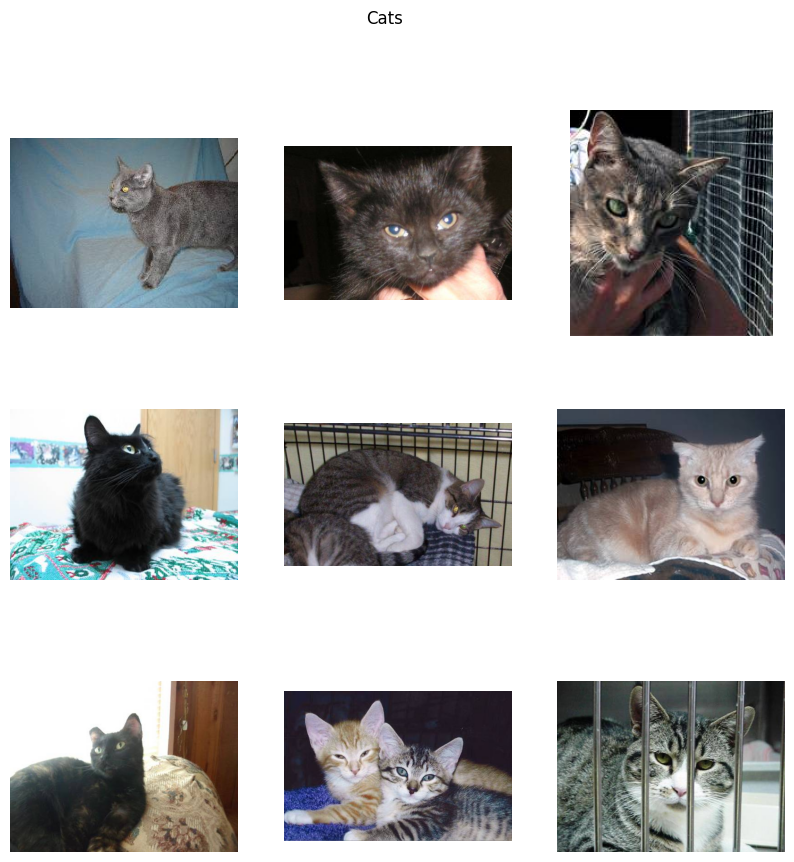

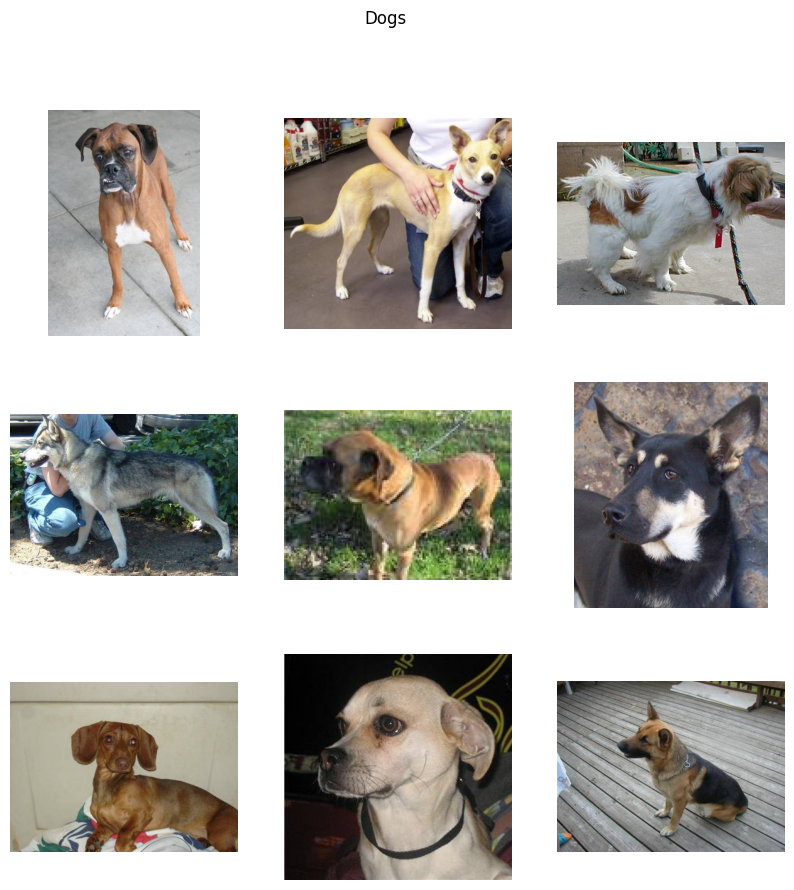

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# Function to display images in a grid
def display_images(image_dir, title):
    # Get list of image filenames
    image_filenames = os.listdir(image_dir)
    # Select the first 9 images
    image_filenames = image_filenames[:9]

    # Set up the plot grid
    plt.figure(figsize=(10,10))
    for i, img_name in enumerate(image_filenames):
        # Full path to image
        img_path = os.path.join(image_dir, img_name)
        # Read and plot image
        img = mpimg.imread(img_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display 9 images of cats
display_images(train_cats_dir, 'Cats')

# Display 9 images of dogs
display_images(train_dogs_dir, 'Dogs')



# **Data Preprocessing**

We need to preprocess the images to have a uniform size and scale the pixel values.

In [ ]:
# Set image dimensions
IMAGE_SIZE = (96, 96)
BATCH_SIZE = 32

# Create ImageDataGenerator for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Because we use binary_crossentropy loss
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



# **Build the Base CNN Model**

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

# **Train the model**

In [ ]:
# Train the model
EPOCHS = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
62/62 [==============================] - 7s 97ms/step - loss: 0.7108 - accuracy: 0.5193 - val_loss: 0.6847 - val_accuracy: 0.4990
Epoch 2/20
62/62 [==============================] - 6s 92ms/step - loss: 0.6940 - accuracy: 0.5137 - val_loss: 0.6820 - val_accuracy: 0.5554
Epoch 3/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6864 - accuracy: 0.5605 - val_loss: 0.6872 - val_accuracy: 0.5333
Epoch 4/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6683 - accuracy: 0.5869 - val_loss: 0.6472 - val_accuracy: 0.6371
Epoch 5/20
62/62 [==============================] - 6s 92ms/step - loss: 0.6240 - accuracy: 0.6580 - val_loss: 0.6149 - val_accuracy: 0.6673
Epoch 6/20
62/62 [==============================] - 6s 90ms/step - loss: 0.5501 - accuracy: 0.7063 - val_loss: 0.5733 - val_accuracy: 0.7087
Epoch 7/20
62/62 [==============================] - 6s 90ms/step - loss: 0.4837 - accuracy: 0.7683 - val_loss: 0.5914 - val_accuracy: 0.6956
Epoch 8/20
62

# **2. Improve Model Performance Using Dropout Regularization**

**Modify the Model to Include Dropout Layers**

In [ ]:
# Build the CNN model with Dropout layers
model_dropout = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),  # Dropout after first pooling layer
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),  # Dropout after second pooling layer
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),  # Dropout after third pooling layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout before the output layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model summary
model_dropout.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 64)       

# **Train the Modified Model**

In [ ]:
# Train the model with Dropout layers
history_dropout = model_dropout.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
62/62 [==============================] - 7s 99ms/step - loss: 0.7421 - accuracy: 0.5066 - val_loss: 0.6917 - val_accuracy: 0.5806
Epoch 2/20
62/62 [==============================] - 6s 94ms/step - loss: 0.6914 - accuracy: 0.5097 - val_loss: 0.6921 - val_accuracy: 0.5282
Epoch 3/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6744 - accuracy: 0.5564 - val_loss: 0.6872 - val_accuracy: 0.5333
Epoch 4/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6539 - accuracy: 0.5859 - val_loss: 0.6362 - val_accuracy: 0.6321
Epoch 5/20
62/62 [==============================] - 6s 93ms/step - loss: 0.6205 - accuracy: 0.6479 - val_loss: 0.6052 - val_accuracy: 0.6714
Epoch 6/20
62/62 [==============================] - 6s 93ms/step - loss: 0.6001 - accuracy: 0.6789 - val_loss: 0.6057 - val_accuracy: 0.6442
Epoch 7/20
62/62 [==============================] - 6s 91ms/step - loss: 0.5710 - accuracy: 0.6946 - val_loss: 0.6233 - val_accuracy: 0.6774
Epoch 8/20
62

# **3. Experiment with Hyperparameter Tuning**

**a) Experiment with Different Learning Rates**

We will create models with different learning rates and observe the impact.

In [ ]:
# Function to build and compile model with a specific learning rate
def build_model_with_lr(learning_rate):
    model_lr = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model_lr.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model_lr

# Test learning rates
learning_rates = [0.01, 0.001, 0.0001]
histories_lr = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}\n")
    model_lr = build_model_with_lr(lr)
    history_lr = model_lr.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )
    histories_lr[lr] = history_lr



Training with learning rate: 0.01

Epoch 1/20
62/62 [==============================] - 7s 93ms/step - loss: 1.6683 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 2/20
62/62 [==============================] - 6s 92ms/step - loss: 0.6937 - accuracy: 0.4868 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 3/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 4/20
62/62 [==============================] - 6s 89ms/step - loss: 0.6933 - accuracy: 0.4797 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 5/20
62/62 [==============================] - 6s 89ms/step - loss: 0.6933 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 6/20
62/62 [==============================] - 5s 87ms/step - loss: 0.6938 - accuracy: 0.4792 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 7/20
62/62 [==============================] - 6s 90ms/step - loss: 0.6936 - accuracy: 0.4832 - val_loss: 0.6931 

# **b) Experiment with Different Batch Sizes**

**We will adjust the batch size and observe the impact.**

In [ ]:
# Test batch sizes
batch_sizes = [16, 32, 64]
histories_bs = {}

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}\n")
    train_generator_bs = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=bs,
        class_mode='binary'
    )
    validation_generator_bs = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=IMAGE_SIZE,
        batch_size=bs,
        class_mode='binary'
    )
    model_bs = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model_bs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_bs = model_bs.fit(
        train_generator_bs,
        steps_per_epoch=train_generator_bs.samples // bs,
        epochs=EPOCHS,
        validation_data=validation_generator_bs,
        validation_steps=validation_generator_bs.samples // bs
    )
    histories_bs[bs] = history_bs



Training with batch size: 16

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
125/125 [==============================] - 8s 52ms/step - loss: 0.7070 - accuracy: 0.5255 - val_loss: 0.6882 - val_accuracy: 0.5181
Epoch 2/20
125/125 [==============================] - 6s 51ms/step - loss: 0.6724 - accuracy: 0.5870 - val_loss: 0.6794 - val_accuracy: 0.6190
Epoch 3/20
125/125 [==============================] - 6s 50ms/step - loss: 0.6197 - accuracy: 0.6625 - val_loss: 0.6665 - val_accuracy: 0.6300
Epoch 4/20
125/125 [==============================] - 6s 50ms/step - loss: 0.5516 - accuracy: 0.7250 - val_loss: 0.5961 - val_accuracy: 0.6905
Epoch 5/20
125/125 [==============================] - 6s 50ms/step - loss: 0.4926 - accuracy: 0.7620 - val_loss: 0.6204 - val_accuracy: 0.6835
Epoch 6/20
125/125 [==============================] - 6s 50ms/step - loss: 0.4395 - accuracy: 0.7995 - val_loss: 0.6457 - val_accuracy: 0.6996
Epoch 7/20
125/125 [=======

# **c) Adjust Number of Layers**

**We will modify the number of convolutional and dense layers.**

In [ ]:
# Model with additional convolutional and dense layers
model_more_layers = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),  # Additional Conv layer
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),  # Additional Dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_more_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_more_layers = model_more_layers.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
62/62 [==============================] - 7s 91ms/step - loss: 0.7008 - accuracy: 0.5076 - val_loss: 0.6930 - val_accuracy: 0.5010
Epoch 2/20
62/62 [==============================] - 5s 88ms/step - loss: 0.6933 - accuracy: 0.5046 - val_loss: 0.6925 - val_accuracy: 0.5010
Epoch 3/20
62/62 [==============================] - 5s 85ms/step - loss: 0.6933 - accuracy: 0.5168 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 4/20
62/62 [==============================] - 5s 85ms/step - loss: 0.6918 - accuracy: 0.5097 - val_loss: 0.6864 - val_accuracy: 0.5181
Epoch 5/20
62/62 [==============================] - 5s 88ms/step - loss: 0.6920 - accuracy: 0.5036 - val_loss: 0.6857 - val_accuracy: 0.5575
Epoch 6/20
62/62 [==============================] - 5s 88ms/step - loss: 0.6784 - accuracy: 0.5686 - val_loss: 0.6805 - val_accuracy: 0.5282
Epoch 7/20
62/62 [==============================] - 5s 88ms/step - loss: 0.6858 - accuracy: 0.5386 - val_loss: 0.6923 - val_accuracy: 0.5050
Epoch 8/20
62

# **d) Vary Filter Size and Number**

**We will adjust the size and number of filters in the convolutional layers.**

In [ ]:
# Model with different filter sizes and numbers
model_filters = models.Sequential([
    layers.Conv2D(64, (5,5), activation='relu', input_shape=(96, 96, 3)),  # Larger filter size and number
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (5,5), activation='relu'),  # Larger filter size and number
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_filters.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_filters = model_filters.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/20
62/62 [==============================] - 18s 265ms/step - loss: 0.8228 - accuracy: 0.5173 - val_loss: 0.6927 - val_accuracy: 0.4990
Epoch 2/20
62/62 [==============================] - 16s 250ms/step - loss: 0.6935 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 3/20
62/62 [==============================] - 16s 252ms/step - loss: 0.6930 - accuracy: 0.5041 - val_loss: 0.6917 - val_accuracy: 0.5101
Epoch 4/20
62/62 [==============================] - 16s 251ms/step - loss: 0.6811 - accuracy: 0.5417 - val_loss: 0.6866 - val_accuracy: 0.5393
Epoch 5/20
62/62 [==============================] - 16s 253ms/step - loss: 0.6520 - accuracy: 0.5930 - val_loss: 0.7039 - val_accuracy: 0.5867
Epoch 6/20
62/62 [==============================] - 16s 254ms/step - loss: 0.6093 - accuracy: 0.6545 - val_loss: 0.7450 - val_accuracy: 0.5827
Epoch 7/20
62/62 [==============================] - 15s 249ms/step - loss: 0.5424 - accuracy: 0.7210 - val_loss: 0.8084 - val_accuracy: 0.5827

# **4. Monitor Performance Using Plots of Accuracy and Loss**

**Function to Plot Accuracy and Loss**

In [ ]:
# Function to plot training and validation accuracy and loss
def plot_performance(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'b', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()


# **Plot Performance of Base Model**



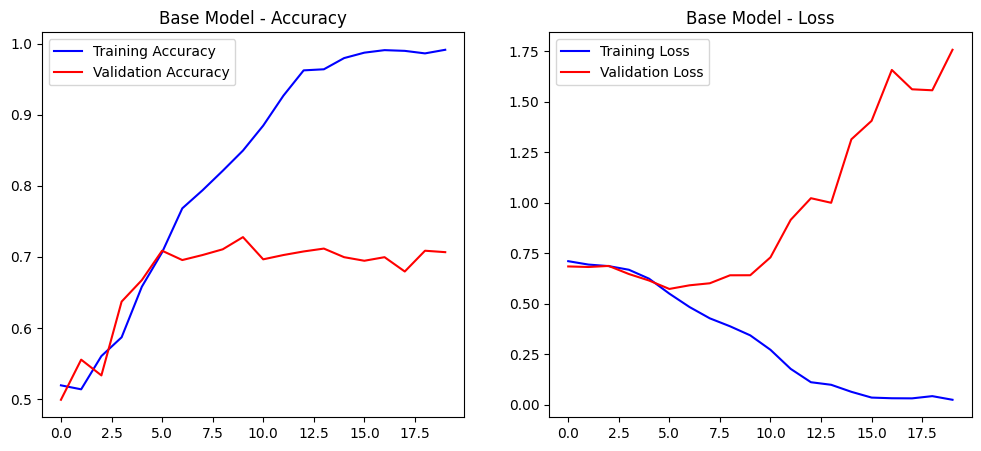

In [ ]:
# Plot performance of the base model
plot_performance(history, 'Base Model')


# **Plot Performance of Model with Dropout**


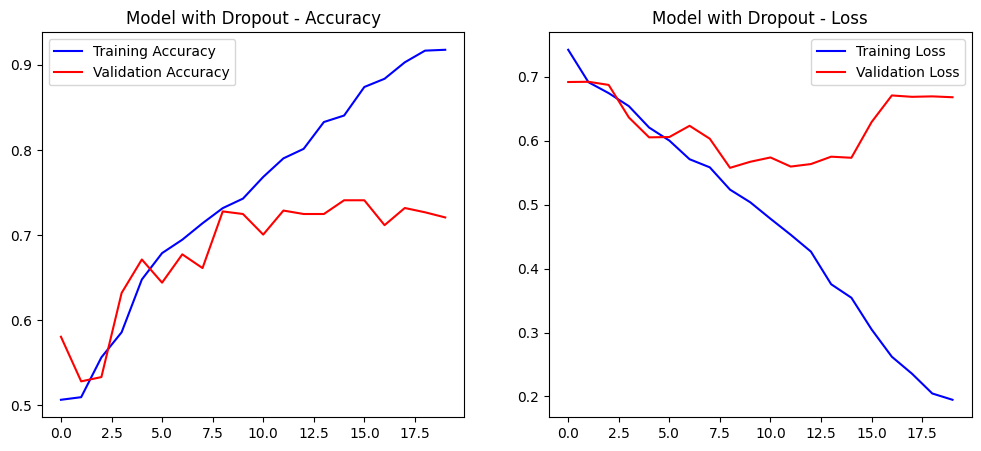

In [ ]:
# Plot performance of the model with Dropout
plot_performance(history_dropout, 'Model with Dropout')


# **Plot Performance of Models with Different Learning Rates**



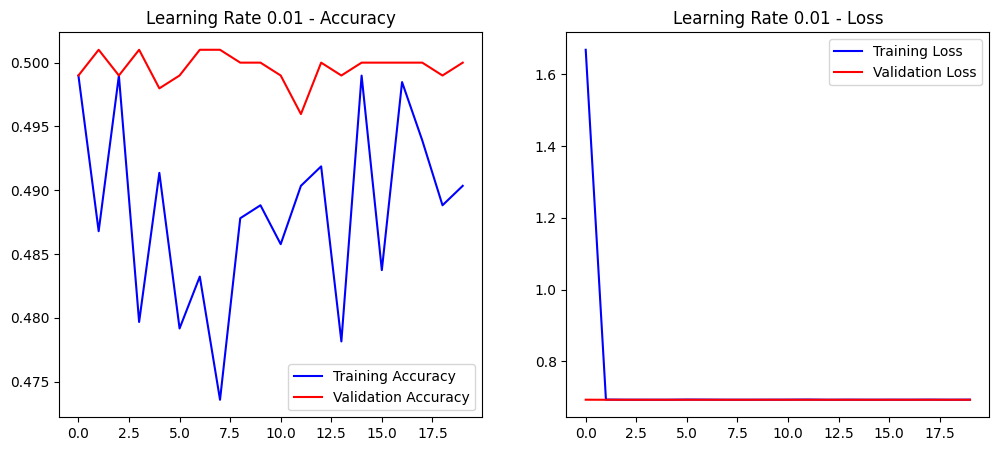

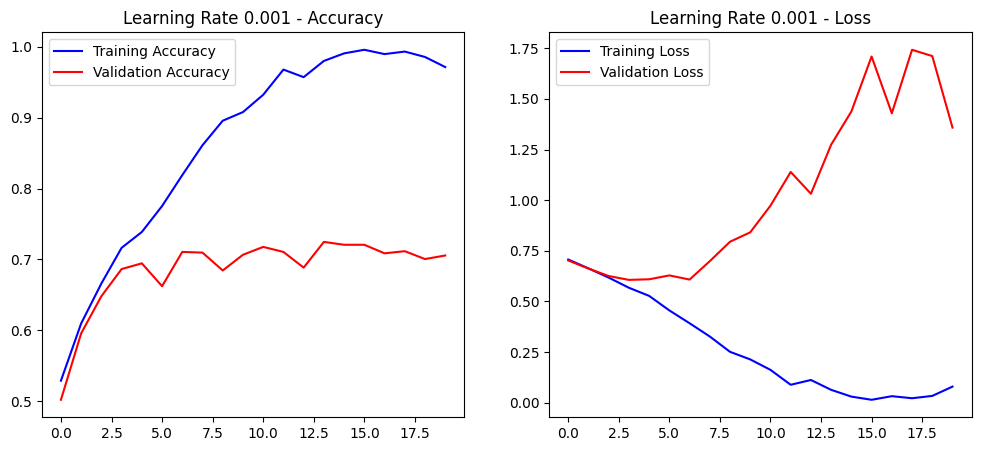

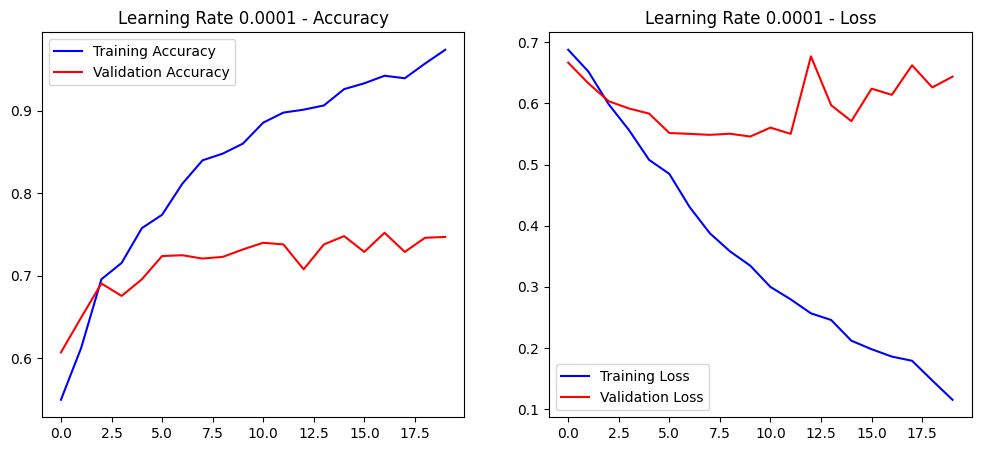

In [ ]:
# Plot performance for different learning rates
for lr, history_lr in histories_lr.items():
    plot_performance(history_lr, f'Learning Rate {lr}')


# **Plot Performance of Models with Different Batch Sizes**



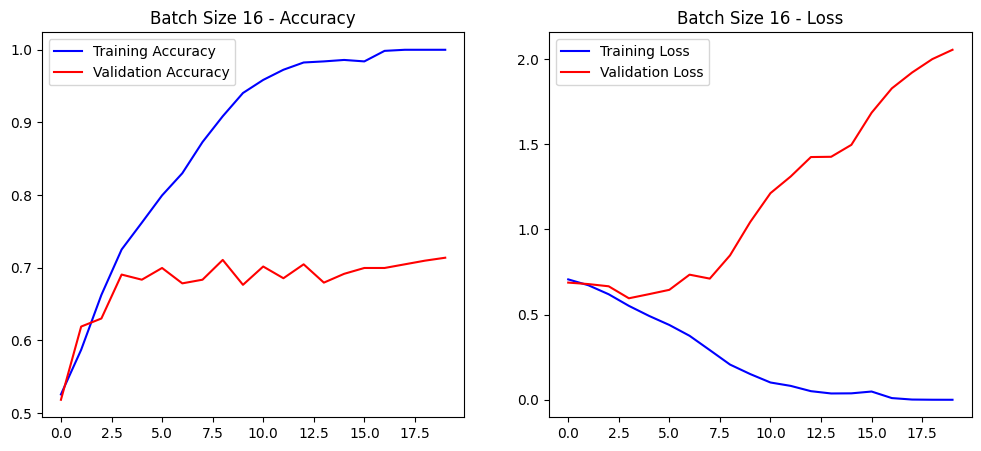

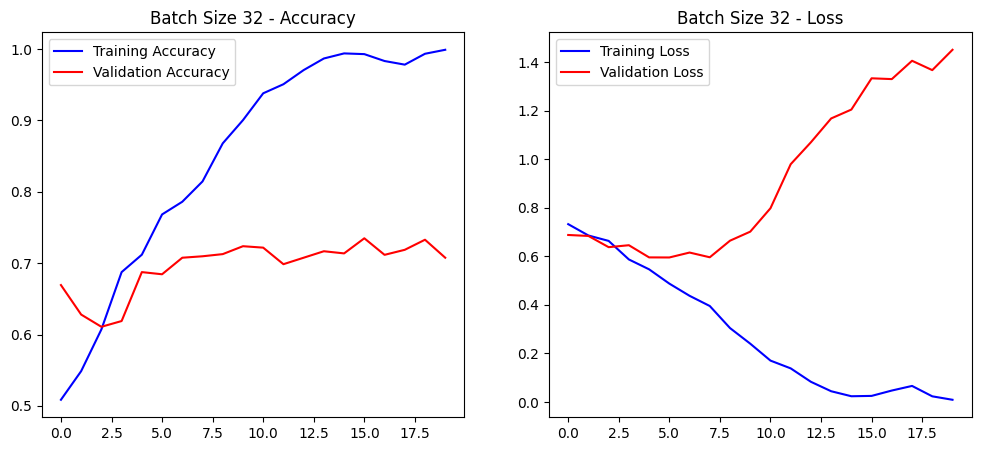

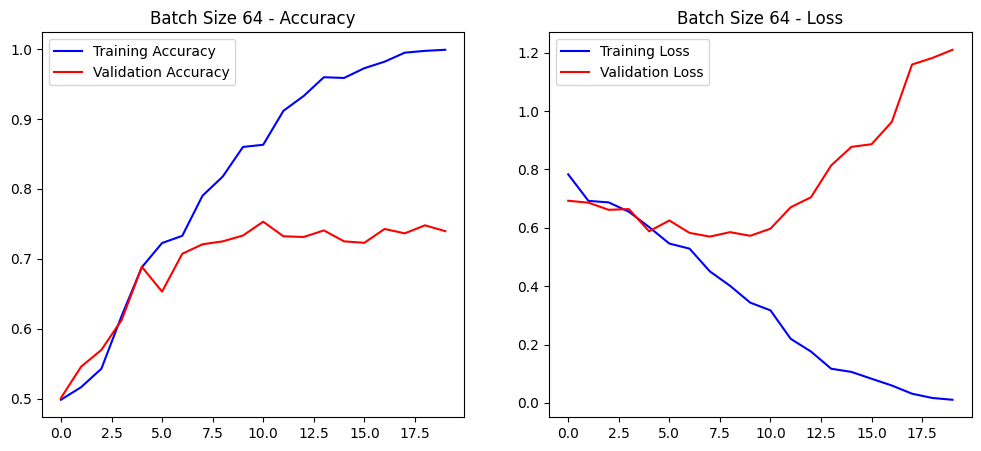

In [ ]:
# Plot performance for different batch sizes
for bs, history_bs in histories_bs.items():
    plot_performance(history_bs, f'Batch Size {bs}')


# **5. Analyze Results Using a Confusion Matrix and Classification Report**
**Generate Predictions on the Validation Set**

In [ ]:
# Generate predictions on the validation set
validation_generator.reset()
Y_pred = model_dropout.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.round(Y_pred).astype(int).flatten()

# Get true labels
y_true = validation_generator.classes


32/32 [==============================] - 2s 44ms/step


# **Confusion Matrix and Classification Report**



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
target_names = list(validation_generator.class_indices.keys())
cr = classification_report(y_true, y_pred, target_names=target_names)
print('Classification Report')
print(cr)


Confusion Matrix
[[202 298]
 [252 248]]
Classification Report
              precision    recall  f1-score   support

        cats       0.44      0.40      0.42       500
        dogs       0.45      0.50      0.47       500

    accuracy                           0.45      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.45      0.45      1000



# **Additional Notes**
**Data Augmentation: To improve generalization, consider using data augmentation techniques.**

In [ ]:
# Data Augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


**Retrain Model with Augmented Data:**

Epoch 1/20
62/62 [==============================] - 10s 154ms/step - loss: 0.6629 - accuracy: 0.6428 - val_loss: 0.5766 - val_accuracy: 0.6946
Epoch 2/20
62/62 [==============================] - 10s 155ms/step - loss: 0.6096 - accuracy: 0.6763 - val_loss: 0.5336 - val_accuracy: 0.7349
Epoch 3/20
62/62 [==============================] - 10s 155ms/step - loss: 0.5897 - accuracy: 0.6926 - val_loss: 0.5143 - val_accuracy: 0.7450
Epoch 4/20
62/62 [==============================] - 10s 155ms/step - loss: 0.5708 - accuracy: 0.7048 - val_loss: 0.5172 - val_accuracy: 0.7419
Epoch 5/20
62/62 [==============================] - 9s 152ms/step - loss: 0.5478 - accuracy: 0.7185 - val_loss: 0.5027 - val_accuracy: 0.7550
Epoch 6/20
62/62 [==============================] - 10s 153ms/step - loss: 0.5587 - accuracy: 0.7109 - val_loss: 0.5112 - val_accuracy: 0.7571
Epoch 7/20
62/62 [==============================] - 10s 156ms/step - loss: 0.5430 - accuracy: 0.7282 - val_loss: 0.5579 - val_accuracy: 0.7218


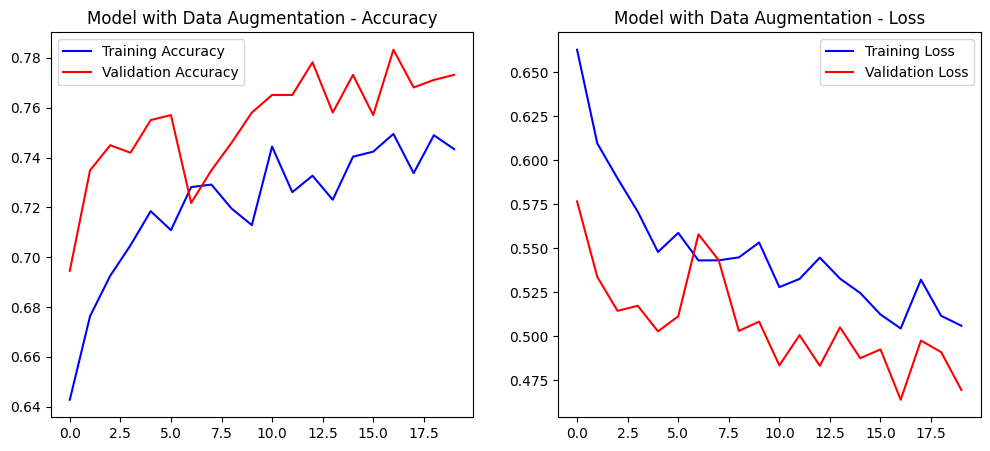

In [ ]:
# Retrain the model with augmented data
history_augmented = model_dropout.fit(
    train_generator_augmented,
    steps_per_epoch=train_generator_augmented.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Plot performance
plot_performance(history_augmented, 'Model with Data Augmentation')
